In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import cv2

np.set_printoptions(threshold=np.inf)

In [2]:
num_images = 3670

In [3]:
dataset = []

for i in range(1, num_images+1):
    img = cv2.imread("color_images/color_" +str(i) +".jpg" )
    dataset.append(np.array(img))

dataset_source = np.asarray(dataset)
print(dataset_source.shape)

dataset_tar = []

for i in range(1, num_images+1):
    img = cv2.imread("gray_images/gray_" +str(i) +".jpg")    
    dataset_tar.append(np.array(img))

dataset_target = np.asarray(dataset_tar)
print(dataset_target.shape)

(3670, 128, 128, 3)
(3670, 128, 128, 3)


In [4]:
def autoencoder(inputs): # Undercomplete Autoencoder
    
    # Encoder
    
    net = tf.layers.conv2d(inputs, 128, 2, activation = tf.nn.relu)
    net = tf.layers.max_pooling2d(net, 2, 2, padding = 'same')
    print(net.shape)
    
    
    #net = tf.layers.conv2d(net, 64, 2, activation = tf.nn.relu)
    #net = tf.layers.max_pooling2d(net, 2, 2, padding = 'same')
    #print(net.shape)
    
    #net = tf.layers.conv2d(net, 32, 2, activation = tf.nn.relu)
    #net = tf.layers.max_pooling2d(net, 2, 2, padding = 'same')
    #print(net.shape)
    
    # Decoder
    
    #net = tf.image.resize_nearest_neighbor(net, tf.constant([33, 33]))
    #net = tf.layers.conv2d(net, 64, 2, activation = tf.nn.relu)
    #print(net.shape)
    
    #net = tf.image.resize_nearest_neighbor(net, tf.constant([65, 65]))
    #net = tf.layers.conv2d(net, 128, 2, activation = tf.nn.relu)
    #print(net.shape)
    
    net = tf.image.resize_nearest_neighbor(net, tf.constant([129, 129]))
    net = tf.layers.conv2d(net, 3, 2, activation = None, name = 'outputOfAuto')

    print(net.shape)
    
    return net

In [5]:
ae_inputs = tf.placeholder(tf.float32, (None, 128, 128, 3), name = 'inputToAuto')
ae_target = tf.placeholder(tf.float32, (None, 128, 128, 3))

ae_outputs = autoencoder(ae_inputs)
lr = 0.001

loss = tf.reduce_mean(tf.square(ae_outputs - ae_target))
train_op = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)
# Intialize the network 
init = tf.global_variables_initializer()

(?, 64, 64, 128)
(?, 128, 128, 3)


In [6]:
batch_size = 32
epoch_num = 50

saving_path = 'K:/autoencoder_color_to_gray/SavedModel/AutoencoderColorToGray.ckpt'

saver_ = tf.train.Saver(max_to_keep = 3)

batch_img = dataset_source[0:batch_size]
batch_out = dataset_target[0:batch_size]

num_batches = num_images//batch_size

sess = tf.Session()
sess.run(init)

for ep in range(epoch_num):
    batch_size = 0
    for batch_n in range(num_batches): # batches loop

        _, c = sess.run([train_op, loss], feed_dict = {ae_inputs: batch_img, ae_target: batch_out})
        print("Epoch: {} - cost = {:.5f}" .format((ep+1), c))
            
        batch_img = dataset_source[batch_size: batch_size+32]
        batch_out = dataset_target[batch_size: batch_size+32]
            
        batch_size += 32
    
    saver_.save(sess, saving_path, global_step = ep)
recon_img = sess.run([ae_outputs], feed_dict = {ae_inputs: batch_img})

sess.close()

Epoch: 1 - cost = 22800.06445
Epoch: 1 - cost = 19597.62891
Epoch: 1 - cost = 17439.10352
Epoch: 1 - cost = 14145.99707
Epoch: 1 - cost = 13176.40918
Epoch: 1 - cost = 10852.99707
Epoch: 1 - cost = 9802.65723
Epoch: 1 - cost = 6642.20312
Epoch: 1 - cost = 4985.89795
Epoch: 1 - cost = 3830.40747
Epoch: 1 - cost = 1696.98633
Epoch: 1 - cost = 1302.50000
Epoch: 1 - cost = 610.07635
Epoch: 1 - cost = 515.88458
Epoch: 1 - cost = 599.13940
Epoch: 1 - cost = 1035.21021
Epoch: 1 - cost = 1244.98083
Epoch: 1 - cost = 1687.86670
Epoch: 1 - cost = 2106.24878
Epoch: 1 - cost = 2008.04004
Epoch: 1 - cost = 1685.28613
Epoch: 1 - cost = 1546.58606
Epoch: 1 - cost = 1421.73535
Epoch: 1 - cost = 940.16400
Epoch: 1 - cost = 795.84668
Epoch: 1 - cost = 932.28143
Epoch: 1 - cost = 770.25470
Epoch: 1 - cost = 532.52368
Epoch: 1 - cost = 481.17026
Epoch: 1 - cost = 299.65976
Epoch: 1 - cost = 495.16455
Epoch: 1 - cost = 457.58093
Epoch: 1 - cost = 340.06894
Epoch: 1 - cost = 372.66360
Epoch: 1 - cost = 582.

Epoch: 3 - cost = 175.00142
Epoch: 3 - cost = 151.02687
Epoch: 3 - cost = 117.77778
Epoch: 3 - cost = 219.63910
Epoch: 3 - cost = 240.00734
Epoch: 3 - cost = 189.00569
Epoch: 3 - cost = 179.86949
Epoch: 3 - cost = 207.19861
Epoch: 3 - cost = 218.06641
Epoch: 3 - cost = 201.46300
Epoch: 3 - cost = 250.34264
Epoch: 3 - cost = 252.88251
Epoch: 3 - cost = 252.59602
Epoch: 3 - cost = 193.70421
Epoch: 3 - cost = 235.12006
Epoch: 3 - cost = 226.73210
Epoch: 3 - cost = 283.07529
Epoch: 3 - cost = 184.36626
Epoch: 3 - cost = 255.52130
Epoch: 3 - cost = 262.07047
Epoch: 3 - cost = 229.65776
Epoch: 3 - cost = 294.38852
Epoch: 3 - cost = 253.22447
Epoch: 3 - cost = 235.39558
Epoch: 3 - cost = 275.75052
Epoch: 3 - cost = 233.36034
Epoch: 3 - cost = 178.92839
Epoch: 3 - cost = 255.63356
Epoch: 3 - cost = 230.25233
Epoch: 3 - cost = 220.24231
Epoch: 3 - cost = 183.69458
Epoch: 3 - cost = 148.91524
Epoch: 3 - cost = 197.05760
Epoch: 3 - cost = 166.54247
Epoch: 3 - cost = 224.92632
Epoch: 3 - cost = 20

Epoch: 6 - cost = 161.94199
Epoch: 6 - cost = 144.84003
Epoch: 6 - cost = 128.70729
Epoch: 6 - cost = 176.76123
Epoch: 6 - cost = 131.01768
Epoch: 6 - cost = 85.41223
Epoch: 6 - cost = 104.42582
Epoch: 6 - cost = 137.12727
Epoch: 6 - cost = 145.76674
Epoch: 6 - cost = 112.79068
Epoch: 6 - cost = 121.92937
Epoch: 6 - cost = 78.03980
Epoch: 6 - cost = 155.08725
Epoch: 6 - cost = 123.19476
Epoch: 6 - cost = 96.76061
Epoch: 6 - cost = 106.57044
Epoch: 6 - cost = 149.54834
Epoch: 6 - cost = 82.30451
Epoch: 6 - cost = 130.22739
Epoch: 6 - cost = 112.10779
Epoch: 6 - cost = 93.92523
Epoch: 6 - cost = 98.44773
Epoch: 6 - cost = 107.40182
Epoch: 6 - cost = 108.21549
Epoch: 6 - cost = 83.51722
Epoch: 6 - cost = 74.45452
Epoch: 6 - cost = 91.85616
Epoch: 6 - cost = 128.72287
Epoch: 6 - cost = 114.64507
Epoch: 6 - cost = 104.09418
Epoch: 6 - cost = 107.24841
Epoch: 6 - cost = 207.25774
Epoch: 6 - cost = 128.45421
Epoch: 6 - cost = 152.83829
Epoch: 6 - cost = 169.11180
Epoch: 6 - cost = 186.90100
E

Epoch: 8 - cost = 227.68910
Epoch: 8 - cost = 235.66109
Epoch: 8 - cost = 207.55888
Epoch: 8 - cost = 264.03503
Epoch: 8 - cost = 228.40300
Epoch: 8 - cost = 212.46477
Epoch: 8 - cost = 248.51115
Epoch: 8 - cost = 209.32768
Epoch: 8 - cost = 162.81061
Epoch: 8 - cost = 232.15462
Epoch: 8 - cost = 207.83565
Epoch: 8 - cost = 196.67578
Epoch: 8 - cost = 164.03291
Epoch: 8 - cost = 131.80365
Epoch: 8 - cost = 177.02077
Epoch: 8 - cost = 150.69136
Epoch: 8 - cost = 201.67564
Epoch: 8 - cost = 184.79979
Epoch: 8 - cost = 142.42517
Epoch: 8 - cost = 131.27705
Epoch: 8 - cost = 194.53798
Epoch: 8 - cost = 169.06447
Epoch: 8 - cost = 128.98125
Epoch: 8 - cost = 162.18542
Epoch: 8 - cost = 204.17010
Epoch: 8 - cost = 177.54126
Epoch: 8 - cost = 239.78908
Epoch: 8 - cost = 232.98158
Epoch: 8 - cost = 156.82101
Epoch: 8 - cost = 209.27966
Epoch: 9 - cost = 153.87923
Epoch: 9 - cost = 165.71327
Epoch: 9 - cost = 139.00235
Epoch: 9 - cost = 134.64194
Epoch: 9 - cost = 139.26704
Epoch: 9 - cost = 15

Epoch: 11 - cost = 100.94363
Epoch: 11 - cost = 142.51599
Epoch: 11 - cost = 77.12442
Epoch: 11 - cost = 124.63004
Epoch: 11 - cost = 105.92536
Epoch: 11 - cost = 89.45108
Epoch: 11 - cost = 91.99445
Epoch: 11 - cost = 100.60506
Epoch: 11 - cost = 102.45444
Epoch: 11 - cost = 78.46423
Epoch: 11 - cost = 70.35886
Epoch: 11 - cost = 86.60470
Epoch: 11 - cost = 122.07550
Epoch: 11 - cost = 107.89010
Epoch: 11 - cost = 98.84393
Epoch: 11 - cost = 101.33316
Epoch: 11 - cost = 196.90504
Epoch: 11 - cost = 121.04321
Epoch: 11 - cost = 144.53098
Epoch: 11 - cost = 160.87140
Epoch: 11 - cost = 178.92603
Epoch: 11 - cost = 169.64153
Epoch: 11 - cost = 116.63018
Epoch: 11 - cost = 128.49809
Epoch: 11 - cost = 145.51872
Epoch: 11 - cost = 133.66829
Epoch: 11 - cost = 103.88100
Epoch: 11 - cost = 144.42345
Epoch: 11 - cost = 99.86353
Epoch: 11 - cost = 108.80505
Epoch: 11 - cost = 153.88893
Epoch: 11 - cost = 137.20184
Epoch: 11 - cost = 121.22211
Epoch: 11 - cost = 152.20625
Epoch: 11 - cost = 131

Epoch: 13 - cost = 206.08296
Epoch: 13 - cost = 241.12437
Epoch: 13 - cost = 203.60890
Epoch: 13 - cost = 157.23737
Epoch: 13 - cost = 227.10085
Epoch: 13 - cost = 200.92900
Epoch: 13 - cost = 190.80229
Epoch: 13 - cost = 158.79027
Epoch: 13 - cost = 126.22250
Epoch: 13 - cost = 172.69891
Epoch: 13 - cost = 144.78389
Epoch: 13 - cost = 195.84471
Epoch: 13 - cost = 178.14958
Epoch: 13 - cost = 138.20020
Epoch: 13 - cost = 127.35645
Epoch: 13 - cost = 187.99580
Epoch: 13 - cost = 164.14565
Epoch: 13 - cost = 123.99725
Epoch: 13 - cost = 157.00075
Epoch: 13 - cost = 198.54475
Epoch: 13 - cost = 172.68066
Epoch: 13 - cost = 233.89008
Epoch: 13 - cost = 227.27116
Epoch: 13 - cost = 152.80653
Epoch: 13 - cost = 205.20050
Epoch: 14 - cost = 150.68112
Epoch: 14 - cost = 162.13081
Epoch: 14 - cost = 135.21892
Epoch: 14 - cost = 130.25697
Epoch: 14 - cost = 136.19415
Epoch: 14 - cost = 153.41902
Epoch: 14 - cost = 144.42390
Epoch: 14 - cost = 117.90635
Epoch: 14 - cost = 137.46407
Epoch: 14 - co

Epoch: 16 - cost = 99.68206
Epoch: 16 - cost = 139.96634
Epoch: 16 - cost = 75.60445
Epoch: 16 - cost = 121.06631
Epoch: 16 - cost = 104.92866
Epoch: 16 - cost = 87.06596
Epoch: 16 - cost = 90.34781
Epoch: 16 - cost = 97.94479
Epoch: 16 - cost = 100.43335
Epoch: 16 - cost = 76.42594
Epoch: 16 - cost = 69.34300
Epoch: 16 - cost = 85.64563
Epoch: 16 - cost = 120.21951
Epoch: 16 - cost = 106.94998
Epoch: 16 - cost = 97.96406
Epoch: 16 - cost = 100.70531
Epoch: 16 - cost = 193.46307
Epoch: 16 - cost = 119.31425
Epoch: 16 - cost = 142.24084
Epoch: 16 - cost = 158.68358
Epoch: 16 - cost = 176.36687
Epoch: 16 - cost = 167.23311
Epoch: 16 - cost = 114.32285
Epoch: 16 - cost = 127.01871
Epoch: 16 - cost = 143.17137
Epoch: 16 - cost = 132.27654
Epoch: 16 - cost = 101.67550
Epoch: 16 - cost = 142.70850
Epoch: 16 - cost = 98.03662
Epoch: 16 - cost = 107.26681
Epoch: 16 - cost = 151.50829
Epoch: 16 - cost = 135.40375
Epoch: 16 - cost = 118.87760
Epoch: 16 - cost = 150.14461
Epoch: 16 - cost = 129.1

Epoch: 18 - cost = 201.27022
Epoch: 18 - cost = 155.53526
Epoch: 18 - cost = 225.25780
Epoch: 18 - cost = 198.77684
Epoch: 18 - cost = 188.51294
Epoch: 18 - cost = 156.58766
Epoch: 18 - cost = 124.53912
Epoch: 18 - cost = 170.66943
Epoch: 18 - cost = 143.02655
Epoch: 18 - cost = 193.54082
Epoch: 18 - cost = 175.68602
Epoch: 18 - cost = 136.66495
Epoch: 18 - cost = 124.92931
Epoch: 18 - cost = 185.96686
Epoch: 18 - cost = 161.25574
Epoch: 18 - cost = 122.19106
Epoch: 18 - cost = 154.79245
Epoch: 18 - cost = 195.46582
Epoch: 18 - cost = 169.95360
Epoch: 18 - cost = 231.10417
Epoch: 18 - cost = 224.71733
Epoch: 18 - cost = 149.91057
Epoch: 18 - cost = 202.74615
Epoch: 19 - cost = 148.56566
Epoch: 19 - cost = 159.97728
Epoch: 19 - cost = 133.09108
Epoch: 19 - cost = 128.16339
Epoch: 19 - cost = 133.96434
Epoch: 19 - cost = 151.63408
Epoch: 19 - cost = 141.39146
Epoch: 19 - cost = 116.11267
Epoch: 19 - cost = 134.30280
Epoch: 19 - cost = 108.01986
Epoch: 19 - cost = 162.73885
Epoch: 19 - co

Epoch: 21 - cost = 76.62847
Epoch: 21 - cost = 119.77554
Epoch: 21 - cost = 104.40057
Epoch: 21 - cost = 87.22512
Epoch: 21 - cost = 89.14635
Epoch: 21 - cost = 97.58337
Epoch: 21 - cost = 98.71090
Epoch: 21 - cost = 76.61340
Epoch: 21 - cost = 67.65856
Epoch: 21 - cost = 84.63464
Epoch: 21 - cost = 118.12713
Epoch: 21 - cost = 104.92197
Epoch: 21 - cost = 96.26780
Epoch: 21 - cost = 99.05908
Epoch: 21 - cost = 191.39252
Epoch: 21 - cost = 118.65403
Epoch: 21 - cost = 140.68608
Epoch: 21 - cost = 157.84392
Epoch: 21 - cost = 175.98988
Epoch: 21 - cost = 165.44038
Epoch: 21 - cost = 114.14101
Epoch: 21 - cost = 125.50134
Epoch: 21 - cost = 142.30060
Epoch: 21 - cost = 131.22218
Epoch: 21 - cost = 100.61981
Epoch: 21 - cost = 141.60432
Epoch: 21 - cost = 97.03913
Epoch: 21 - cost = 106.59140
Epoch: 21 - cost = 150.25746
Epoch: 21 - cost = 134.22853
Epoch: 21 - cost = 116.89155
Epoch: 21 - cost = 148.57732
Epoch: 21 - cost = 127.78439
Epoch: 21 - cost = 97.74769
Epoch: 21 - cost = 184.542

Epoch: 23 - cost = 154.48187
Epoch: 23 - cost = 224.13190
Epoch: 23 - cost = 197.39305
Epoch: 23 - cost = 187.22522
Epoch: 23 - cost = 155.41563
Epoch: 23 - cost = 123.55532
Epoch: 23 - cost = 169.69258
Epoch: 23 - cost = 141.91008
Epoch: 23 - cost = 192.31728
Epoch: 23 - cost = 174.37505
Epoch: 23 - cost = 135.89186
Epoch: 23 - cost = 123.90930
Epoch: 23 - cost = 184.64900
Epoch: 23 - cost = 160.04533
Epoch: 23 - cost = 121.29066
Epoch: 23 - cost = 153.92766
Epoch: 23 - cost = 194.06841
Epoch: 23 - cost = 168.74942
Epoch: 23 - cost = 229.68542
Epoch: 23 - cost = 223.50636
Epoch: 23 - cost = 148.88863
Epoch: 23 - cost = 201.79359
Epoch: 24 - cost = 147.78297
Epoch: 24 - cost = 158.81476
Epoch: 24 - cost = 131.99194
Epoch: 24 - cost = 127.17200
Epoch: 24 - cost = 132.89984
Epoch: 24 - cost = 150.52080
Epoch: 24 - cost = 140.45819
Epoch: 24 - cost = 115.35694
Epoch: 24 - cost = 133.23857
Epoch: 24 - cost = 107.17698
Epoch: 24 - cost = 162.49925
Epoch: 24 - cost = 158.62671
Epoch: 24 - co

Epoch: 26 - cost = 119.23132
Epoch: 26 - cost = 104.59811
Epoch: 26 - cost = 87.61839
Epoch: 26 - cost = 88.56536
Epoch: 26 - cost = 97.60891
Epoch: 26 - cost = 98.04700
Epoch: 26 - cost = 76.87559
Epoch: 26 - cost = 67.28474
Epoch: 26 - cost = 84.65507
Epoch: 26 - cost = 117.54542
Epoch: 26 - cost = 104.55027
Epoch: 26 - cost = 95.83595
Epoch: 26 - cost = 98.71095
Epoch: 26 - cost = 190.39502
Epoch: 26 - cost = 118.06023
Epoch: 26 - cost = 140.07060
Epoch: 26 - cost = 156.99451
Epoch: 26 - cost = 175.20735
Epoch: 26 - cost = 164.59697
Epoch: 26 - cost = 113.61912
Epoch: 26 - cost = 124.78079
Epoch: 26 - cost = 141.52158
Epoch: 26 - cost = 130.68280
Epoch: 26 - cost = 99.84808
Epoch: 26 - cost = 140.91457
Epoch: 26 - cost = 96.40012
Epoch: 26 - cost = 106.08248
Epoch: 26 - cost = 149.54842
Epoch: 26 - cost = 133.51543
Epoch: 26 - cost = 116.02950
Epoch: 26 - cost = 147.53294
Epoch: 26 - cost = 127.06958
Epoch: 26 - cost = 97.07072
Epoch: 26 - cost = 183.25594
Epoch: 26 - cost = 201.092

Epoch: 28 - cost = 186.41368
Epoch: 28 - cost = 155.00261
Epoch: 28 - cost = 122.73114
Epoch: 28 - cost = 169.32062
Epoch: 28 - cost = 141.52397
Epoch: 28 - cost = 191.50203
Epoch: 28 - cost = 173.90633
Epoch: 28 - cost = 135.80490
Epoch: 28 - cost = 123.36160
Epoch: 28 - cost = 184.52637
Epoch: 28 - cost = 159.17352
Epoch: 28 - cost = 121.05903
Epoch: 28 - cost = 153.41237
Epoch: 28 - cost = 193.54597
Epoch: 28 - cost = 168.61700
Epoch: 28 - cost = 228.74815
Epoch: 28 - cost = 223.23848
Epoch: 28 - cost = 148.67938
Epoch: 28 - cost = 201.00690
Epoch: 29 - cost = 147.70209
Epoch: 29 - cost = 158.04131
Epoch: 29 - cost = 131.28656
Epoch: 29 - cost = 126.59180
Epoch: 29 - cost = 132.19579
Epoch: 29 - cost = 149.69682
Epoch: 29 - cost = 139.64796
Epoch: 29 - cost = 115.02682
Epoch: 29 - cost = 132.43039
Epoch: 29 - cost = 106.45113
Epoch: 29 - cost = 162.38557
Epoch: 29 - cost = 158.07097
Epoch: 29 - cost = 107.50770
Epoch: 29 - cost = 125.51025
Epoch: 29 - cost = 122.54138
Epoch: 29 - co

Epoch: 31 - cost = 88.19590
Epoch: 31 - cost = 97.69366
Epoch: 31 - cost = 97.62106
Epoch: 31 - cost = 77.09272
Epoch: 31 - cost = 67.09240
Epoch: 31 - cost = 84.62167
Epoch: 31 - cost = 117.10651
Epoch: 31 - cost = 104.18561
Epoch: 31 - cost = 95.50607
Epoch: 31 - cost = 98.39868
Epoch: 31 - cost = 189.61620
Epoch: 31 - cost = 117.56654
Epoch: 31 - cost = 139.69402
Epoch: 31 - cost = 156.36905
Epoch: 31 - cost = 174.90833
Epoch: 31 - cost = 163.98383
Epoch: 31 - cost = 113.06037
Epoch: 31 - cost = 124.23336
Epoch: 31 - cost = 140.64540
Epoch: 31 - cost = 130.26775
Epoch: 31 - cost = 99.23672
Epoch: 31 - cost = 140.41667
Epoch: 31 - cost = 95.94235
Epoch: 31 - cost = 105.70725
Epoch: 31 - cost = 149.16524
Epoch: 31 - cost = 133.00394
Epoch: 31 - cost = 115.45428
Epoch: 31 - cost = 146.62202
Epoch: 31 - cost = 126.48844
Epoch: 31 - cost = 96.68923
Epoch: 31 - cost = 182.20978
Epoch: 31 - cost = 200.28223
Epoch: 31 - cost = 156.72371
Epoch: 31 - cost = 148.45412
Epoch: 31 - cost = 172.33

Epoch: 33 - cost = 154.12413
Epoch: 33 - cost = 122.29593
Epoch: 33 - cost = 168.77702
Epoch: 33 - cost = 141.88036
Epoch: 33 - cost = 190.89885
Epoch: 33 - cost = 173.94598
Epoch: 33 - cost = 137.33809
Epoch: 33 - cost = 122.69083
Epoch: 33 - cost = 186.65411
Epoch: 33 - cost = 158.61627
Epoch: 33 - cost = 121.68454
Epoch: 33 - cost = 153.24577
Epoch: 33 - cost = 192.88344
Epoch: 33 - cost = 168.58647
Epoch: 33 - cost = 227.93166
Epoch: 33 - cost = 223.84898
Epoch: 33 - cost = 148.00601
Epoch: 33 - cost = 200.30299
Epoch: 34 - cost = 147.32829
Epoch: 34 - cost = 157.06984
Epoch: 34 - cost = 130.89740
Epoch: 34 - cost = 125.87452
Epoch: 34 - cost = 131.77417
Epoch: 34 - cost = 148.98582
Epoch: 34 - cost = 139.31584
Epoch: 34 - cost = 115.08685
Epoch: 34 - cost = 131.76176
Epoch: 34 - cost = 106.43903
Epoch: 34 - cost = 162.56183
Epoch: 34 - cost = 157.13629
Epoch: 34 - cost = 107.59396
Epoch: 34 - cost = 124.97994
Epoch: 34 - cost = 121.36704
Epoch: 34 - cost = 157.13609
Epoch: 34 - co

Epoch: 36 - cost = 87.73019
Epoch: 36 - cost = 96.95746
Epoch: 36 - cost = 97.16482
Epoch: 36 - cost = 76.37764
Epoch: 36 - cost = 66.83181
Epoch: 36 - cost = 83.91272
Epoch: 36 - cost = 116.65110
Epoch: 36 - cost = 103.56977
Epoch: 36 - cost = 95.20883
Epoch: 36 - cost = 97.83651
Epoch: 36 - cost = 188.75012
Epoch: 36 - cost = 116.72491
Epoch: 36 - cost = 139.32707
Epoch: 36 - cost = 155.35847
Epoch: 36 - cost = 174.19019
Epoch: 36 - cost = 163.42815
Epoch: 36 - cost = 112.09516
Epoch: 36 - cost = 123.83112
Epoch: 36 - cost = 139.58171
Epoch: 36 - cost = 129.62021
Epoch: 36 - cost = 98.57221
Epoch: 36 - cost = 139.62230
Epoch: 36 - cost = 95.74442
Epoch: 36 - cost = 104.90179
Epoch: 36 - cost = 148.91930
Epoch: 36 - cost = 132.50804
Epoch: 36 - cost = 114.91889
Epoch: 36 - cost = 146.11375
Epoch: 36 - cost = 125.77139
Epoch: 36 - cost = 96.53339
Epoch: 36 - cost = 181.29997
Epoch: 36 - cost = 199.38908
Epoch: 36 - cost = 156.33220
Epoch: 36 - cost = 147.70177
Epoch: 36 - cost = 171.35

Epoch: 38 - cost = 167.58440
Epoch: 38 - cost = 140.48717
Epoch: 38 - cost = 190.19275
Epoch: 38 - cost = 172.71313
Epoch: 38 - cost = 136.21594
Epoch: 38 - cost = 121.80017
Epoch: 38 - cost = 184.51668
Epoch: 38 - cost = 157.97954
Epoch: 38 - cost = 120.31940
Epoch: 38 - cost = 152.72707
Epoch: 38 - cost = 191.46399
Epoch: 38 - cost = 167.46373
Epoch: 38 - cost = 226.95232
Epoch: 38 - cost = 222.01601
Epoch: 38 - cost = 147.42471
Epoch: 38 - cost = 199.15514
Epoch: 39 - cost = 146.32970
Epoch: 39 - cost = 156.50209
Epoch: 39 - cost = 129.87056
Epoch: 39 - cost = 125.48980
Epoch: 39 - cost = 130.77094
Epoch: 39 - cost = 148.13744
Epoch: 39 - cost = 138.17676
Epoch: 39 - cost = 113.45603
Epoch: 39 - cost = 131.11899
Epoch: 39 - cost = 104.94775
Epoch: 39 - cost = 160.67006
Epoch: 39 - cost = 157.03477
Epoch: 39 - cost = 105.97449
Epoch: 39 - cost = 124.26806
Epoch: 39 - cost = 121.91618
Epoch: 39 - cost = 156.23180
Epoch: 39 - cost = 143.74641
Epoch: 39 - cost = 129.41864
Epoch: 39 - co

Epoch: 41 - cost = 74.74566
Epoch: 41 - cost = 66.88827
Epoch: 41 - cost = 82.84907
Epoch: 41 - cost = 116.32534
Epoch: 41 - cost = 103.35114
Epoch: 41 - cost = 94.86746
Epoch: 41 - cost = 97.39899
Epoch: 41 - cost = 188.28058
Epoch: 41 - cost = 115.51400
Epoch: 41 - cost = 139.04561
Epoch: 41 - cost = 154.53648
Epoch: 41 - cost = 172.71666
Epoch: 41 - cost = 162.70439
Epoch: 41 - cost = 111.25480
Epoch: 41 - cost = 122.98328
Epoch: 41 - cost = 138.89352
Epoch: 41 - cost = 128.57910
Epoch: 41 - cost = 98.21732
Epoch: 41 - cost = 138.25156
Epoch: 41 - cost = 95.72632
Epoch: 41 - cost = 103.85435
Epoch: 41 - cost = 148.27203
Epoch: 41 - cost = 132.41808
Epoch: 41 - cost = 114.22501
Epoch: 41 - cost = 146.33333
Epoch: 41 - cost = 125.51675
Epoch: 41 - cost = 95.77613
Epoch: 41 - cost = 180.84233
Epoch: 41 - cost = 198.29675
Epoch: 41 - cost = 155.46449
Epoch: 41 - cost = 147.40765
Epoch: 41 - cost = 170.94792
Epoch: 41 - cost = 180.46858
Epoch: 41 - cost = 165.23680
Epoch: 41 - cost = 205

Epoch: 43 - cost = 171.12202
Epoch: 43 - cost = 134.49074
Epoch: 43 - cost = 121.15377
Epoch: 43 - cost = 181.74489
Epoch: 43 - cost = 157.66628
Epoch: 43 - cost = 118.84564
Epoch: 43 - cost = 151.90680
Epoch: 43 - cost = 190.64294
Epoch: 43 - cost = 165.89513
Epoch: 43 - cost = 226.44817
Epoch: 43 - cost = 220.21240
Epoch: 43 - cost = 145.93571
Epoch: 43 - cost = 199.27428
Epoch: 44 - cost = 145.40065
Epoch: 44 - cost = 156.51114
Epoch: 44 - cost = 130.69086
Epoch: 44 - cost = 124.67558
Epoch: 44 - cost = 130.84964
Epoch: 44 - cost = 149.57356
Epoch: 44 - cost = 138.75291
Epoch: 44 - cost = 112.65150
Epoch: 44 - cost = 131.58080
Epoch: 44 - cost = 106.70200
Epoch: 44 - cost = 161.20042
Epoch: 44 - cost = 155.57503
Epoch: 44 - cost = 106.41150
Epoch: 44 - cost = 123.86686
Epoch: 44 - cost = 120.28303
Epoch: 44 - cost = 155.56499
Epoch: 44 - cost = 142.99962
Epoch: 44 - cost = 128.02629
Epoch: 44 - cost = 143.60446
Epoch: 44 - cost = 129.15007
Epoch: 44 - cost = 114.06654
Epoch: 44 - co

Epoch: 46 - cost = 82.54999
Epoch: 46 - cost = 116.39188
Epoch: 46 - cost = 103.15874
Epoch: 46 - cost = 95.11190
Epoch: 46 - cost = 97.54108
Epoch: 46 - cost = 187.53148
Epoch: 46 - cost = 114.92509
Epoch: 46 - cost = 138.42999
Epoch: 46 - cost = 153.65526
Epoch: 46 - cost = 172.05750
Epoch: 46 - cost = 162.27090
Epoch: 46 - cost = 110.54491
Epoch: 46 - cost = 122.05035
Epoch: 46 - cost = 138.19075
Epoch: 46 - cost = 127.83368
Epoch: 46 - cost = 97.92907
Epoch: 46 - cost = 137.37938
Epoch: 46 - cost = 95.40275
Epoch: 46 - cost = 103.24280
Epoch: 46 - cost = 147.55943
Epoch: 46 - cost = 132.03407
Epoch: 46 - cost = 113.62437
Epoch: 46 - cost = 146.11272
Epoch: 46 - cost = 125.58227
Epoch: 46 - cost = 95.37625
Epoch: 46 - cost = 179.99565
Epoch: 46 - cost = 197.67676
Epoch: 46 - cost = 154.33383
Epoch: 46 - cost = 146.45389
Epoch: 46 - cost = 170.58922
Epoch: 46 - cost = 180.11369
Epoch: 46 - cost = 164.59505
Epoch: 46 - cost = 204.84766
Epoch: 46 - cost = 208.62646
Epoch: 46 - cost = 2

Epoch: 48 - cost = 133.89555
Epoch: 48 - cost = 120.64692
Epoch: 48 - cost = 181.30235
Epoch: 48 - cost = 157.02864
Epoch: 48 - cost = 118.40827
Epoch: 48 - cost = 151.42238
Epoch: 48 - cost = 190.01079
Epoch: 48 - cost = 165.23393
Epoch: 48 - cost = 225.75618
Epoch: 48 - cost = 219.82021
Epoch: 48 - cost = 145.12564
Epoch: 48 - cost = 198.38477
Epoch: 49 - cost = 145.05876
Epoch: 49 - cost = 155.47943
Epoch: 49 - cost = 129.95482
Epoch: 49 - cost = 124.19949
Epoch: 49 - cost = 130.00697
Epoch: 49 - cost = 149.04817
Epoch: 49 - cost = 138.84706
Epoch: 49 - cost = 112.36990
Epoch: 49 - cost = 130.69576
Epoch: 49 - cost = 106.46655
Epoch: 49 - cost = 161.66515
Epoch: 49 - cost = 155.16843
Epoch: 49 - cost = 106.14663
Epoch: 49 - cost = 123.76502
Epoch: 49 - cost = 119.80570
Epoch: 49 - cost = 154.95857
Epoch: 49 - cost = 142.55997
Epoch: 49 - cost = 127.46311
Epoch: 49 - cost = 142.97563
Epoch: 49 - cost = 128.72845
Epoch: 49 - cost = 113.53294
Epoch: 49 - cost = 160.17021
Epoch: 49 - co

<class 'numpy.ndarray'>


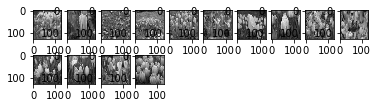

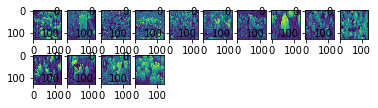

In [7]:
plt.figure(1)
print(type(recon_img[0]))
gen_img = recon_img[0]

plt.title('Reconstructed Images')
for i in range(14):
    plt.subplot(5, 10, i+1)
    plt.imshow(gen_img[i, ..., 0], cmap = 'gray')
plt.figure(2)
plt.title('Input Images')
for i in range(14):
    plt.subplot(5, 10, i+1)
    plt.imshow(batch_img[i, ..., 0])
plt.show()


In [6]:
saver = tf.train.Saver()

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

saver.restore(sess, 'K:/autoencoder_color_to_gray/SavedModel/AutoencoderColorToGray.ckpt-49')

INFO:tensorflow:Restoring parameters from K:/autoencoder_color_to_gray/SavedModel/AutoencoderColorToGray.ckpt-49


In [10]:
beg = 32
end = beg + 32

batch_imgs = dataset_source[beg: end]
target_imgs = dataset_target[beg: end]
gray_imgs = sess.run(ae_outputs, feed_dict = {ae_inputs: batch_imgs})

In [11]:
print(gray_imgs.shape)

for i in range(0, 32):
    cv2.imwrite('gen_gray_images/gen_gray_' +str(i) +'.jpeg', gray_imgs[i])

#plt.imshow(gray_imgs[12, ..., 0], cmap = 'gray')
#tmp = batch_imgs[12]
#batch_imgs[12] = tmp[...,::-1]
#plt.figure()
#plt.imshow(batch_imgs[12, ..., 0])
#plt.figure()
#plt.imshow(target_imgs[12, ..., 0], cmap = 'gray')

#cv2.imshow('color', batch_imgs[12])
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(32, 128, 128, 3)
